<a href="https://colab.research.google.com/github/Diwakar-Gupta/Data-Science-APRIL/blob/main/22-07-14-CNN/DataAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
IMAGE_SIZE = (240, 240, 3)

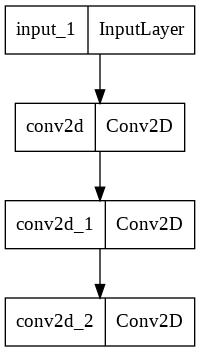

In [3]:
model = tf.keras.Sequential([
            tf.keras.Input(shape=IMAGE_SIZE),
            tf.keras.layers.Conv2D(5, (3,3)),
            tf.keras.layers.Conv2D(3, (3,3)),
            tf.keras.layers.Conv2D(1, (3,3)),
])

tf.keras.utils.plot_model(model)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 240, 240, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1 (Conv2D)                 (None, 240, 240, 5)  140         ['input_2[0][0]']                
                                                                                                  
 conv2 (Conv2D)                 (None, 240, 240, 3)  138         ['conv1[0][0]']                  
                                                                                                  
 add (Add)                      (None, 240, 240, 3)  0           ['input_2[0][0]',            

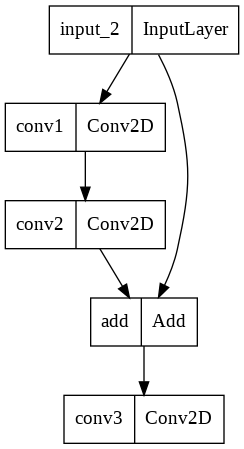

In [4]:
input = tf.keras.Input(shape=IMAGE_SIZE)
conv1 = tf.keras.layers.Conv2D(5, (3,3),padding="SAME", name='conv1')(input)
conv2 = tf.keras.layers.Conv2D(3, (3,3),padding="SAME", name='conv2')(conv1)

add = tf.keras.layers.add([input, conv2])

conv3 = tf.keras.layers.Conv2D(2, (3,3),padding="SAME", name='conv3')(add)


model = tf.keras.Model(inputs=[input], outputs=[conv3])

print(model.summary())
tf.keras.utils.plot_model(model)

https://www.kaggle.com/c/malaria-parasite-detection/data

https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

In [5]:
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos',origin=dataset_url,untar=True)

228827136/228813984 [==============================] - 2s 0us/step


In [6]:
data_dir

'/root/.keras/datasets/flower_photos'

In [7]:
! ls /root/.keras/datasets/flower_photos

daisy  dandelion  LICENSE.txt  roses  sunflowers  tulips


In [8]:
! rm /root/.keras/datasets/flower_photos/LICENSE.txt

In [9]:
! ls /root/.keras/datasets/flower_photos

daisy  dandelion  roses  sunflowers  tulips


(500, 333)


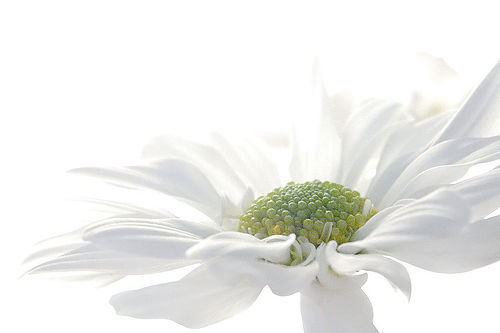

In [10]:
from PIL import Image

img = '/root/.keras/datasets/flower_photos/daisy/11642632_1e7627a2cc.jpg'

im = Image.open(img)
print(im.size)
im

In [15]:
SEED = 89

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    batch_size=32,
    image_size=(256, 256),
    seed = SEED,
    validation_split=0.3,
    subset='training',
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    batch_size=32,
    image_size=(256, 256),
    seed = SEED,
    validation_split=0.3,
    subset='validation',
)

Found 3670 files belonging to 5 classes.
Using 2569 files for training.
Found 3670 files belonging to 5 classes.
Using 1101 files for validation.


https://www.tensorflow.org/tutorials/images/data_augmentation

In [20]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
])

In [22]:

model = tf.keras.Sequential([
            tf.keras.Input(shape=(256, 256, 3)),
            data_augmentation, # only works during training, not functional in testing
            tf.keras.layers.Conv2D(8, (3,3)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Conv2D(16, (3,3)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Conv2D(32, (3,3)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.GlobalAveragePooling2D(),
            tf.keras.layers.Dense(5, activation='sigmoid'),
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 254, 254, 8)       224       
                                                                 
 batch_normalization_6 (Batc  (None, 254, 254, 8)      32        
 hNormalization)                                                 
                                                                 
 conv2d_12 (Conv2D)          (None, 252, 252, 16)      1168      
                                                                 
 batch_normalization_7 (Batc  (None, 252, 252, 16)     64        
 hNormalization)                                                 
                                                                 
 conv2d_13 (Conv2D)          (None, 250, 250, 32)     

In [23]:
model.compile(
    optimizer='Nadam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [24]:
model.fit(train_ds, epochs=6)

Epoch 1/6
81/81 [==============================] - 11s 106ms/step - loss: 1.4376 - accuracy: 0.3472
Epoch 2/6
81/81 [==============================] - 9s 107ms/step - loss: 1.4077 - accuracy: 0.3605
Epoch 3/6
81/81 [==============================] - 9s 108ms/step - loss: 1.4105 - accuracy: 0.3569
Epoch 4/6
81/81 [==============================] - 9s 108ms/step - loss: 1.4135 - accuracy: 0.3531
Epoch 5/6
81/81 [==============================] - 9s 109ms/step - loss: 1.4015 - accuracy: 0.3616
Epoch 6/6
81/81 [==============================] - 9s 108ms/step - loss: 1.4027 - accuracy: 0.3612


In [25]:
model.evaluate(validation_ds)

35/35 [==============================] - 2s 55ms/step - loss: 1.4126 - accuracy: 0.3542


[1.4126111268997192, 0.35422343015670776]

In [19]:
model.evaluate(validation_ds)

35/35 [==============================] - 3s 61ms/step - loss: 1.4243 - accuracy: 0.3406


[1.424289584159851, 0.3405994474887848]